In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
%matplotlib inline
# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score
seed = 123

In [50]:
# 读取csv文件
data_path = os.path.join(os.getcwd(), 'Datas', 'Auto-Data.csv')
# ?代表缺失值  用NaN替代
data = pd.read_csv(data_path, na_values='?')


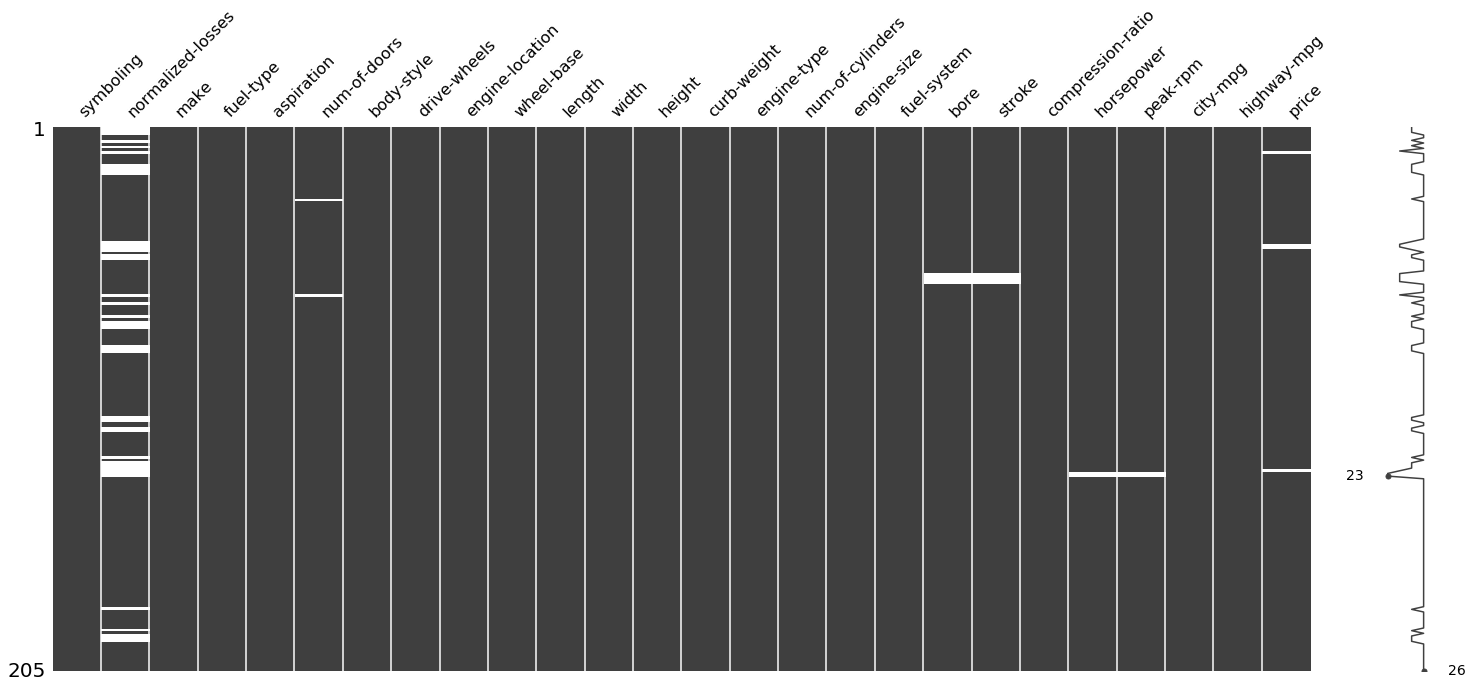

In [51]:
# 查看缺失值
msno.matrix(data)


In [52]:
# 查看'normalized-losses'列是缺失值的数据
data[pd.isnull(data['normalized-losses'])].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


In [1]:
# sns.set(style='ticks')
# 查看分布累积是为了看一下NaN的值到底是用哪一种方式填充，如果这一行数据出现偏度，那就不能用总体的均值去填充缺失数据
# 查看图表以后  会发现  低于200的大概有80%  低于125有将近60%，用中位数去填充稍微还是有点问题，虽然也可以
# 累积概率分布
cdf = ECDF(data['normalized-losses'])
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(cdf.x,cdf.y,color='b')
plt.grid()
# print(cdf.x)
# print(cdf.y)
plt.subplot(122)
plt.hist(data['normalized-losses'].dropna(),bins=int(np.sqrt(len(data['normalized-losses']))), color='r')

NameError: name 'ECDF' is not defined

In [54]:
# 既然不用中位数去填充   那就去找一下和这个特征有联系的数据进行分组，然后再取中位数
data.groupby('symboling')['normalized-losses'].describe()

,count,mean,std,min,25%,50%,75%,max
symboling,,,,,,,,
-2,3.0,103.000000,0.000000,103.0,103.00,103.0,103.0,103.0
-1,20.0,85.600000,18.528499,65.0,71.75,91.5,95.0,137.0
0,48.0,113.166667,32.510773,77.0,91.00,102.0,120.5,192.0
1,47.0,128.574468,28.478630,74.0,105.50,125.0,148.0,231.0
2,29.0,125.689655,30.167513,83.0,94.00,134.0,137.0,192.0
3,17.0,168.647059,30.636867,142.0,150.00,150.0,194.0,256.0


In [55]:
a = data.groupby('symboling')['normalized-losses']
a
# 通过分组可以根据给定的字段值，把原数据进行分组。然后再根据分组取出相应的特征

In [56]:
data = data.dropna(subset=['price', 'bore', 'stroke', 'peak-rpm', 'horsepower', 'num-of-doors']).copy()
data['normalized-losses'] = data.groupby('symboling')['normalized-losses'].transform(lambda x: x.fillna(x.mean()))

In [57]:
data.shape

(193, 26)

In [58]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [59]:
cormatrix = data.corr()
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.593658,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.593658,1.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602
wheel-base,-0.536516,-0.167286,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,-0.038857,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,0.034178,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.445925,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,0.085758,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.068327,0.152544,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.144785,0.032765,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.010884,0.057834,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [60]:
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
cormatrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,0.0,0.593658,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.0,0.000000,-0.167286,-0.038857,0.034178,-0.445925,0.085758,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.245313,-0.189911,0.160602
wheel-base,-0.0,-0.000000,0.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.0,-0.000000,0.000000,0.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.0,0.000000,0.000000,0.000000,0.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine-size,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,-0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,-0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007


In [61]:
cormatrix = cormatrix.stack()
cormatrix

symboling          symboling            0.000000
                   normalized-losses    0.593658
                   wheel-base          -0.536516
                   length              -0.363194
                   width               -0.247741
                   height              -0.517803
                   curb-weight         -0.231086
                   engine-size         -0.068327
                   bore                -0.144785
                   stroke              -0.010884
                   compression-ratio   -0.175160
                   horsepower           0.069491
                   peak-rpm             0.227899
                   city-mpg             0.017639
                   highway-mpg          0.085775
                   price               -0.084835
normalized-losses  symboling            0.000000
                   normalized-losses    0.000000
                   wheel-base          -0.167286
                   length              -0.038857
                   w

In [62]:
cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
cormatrix

,level_0,level_1,0
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640
5,length,width,0.857368
6,curb-weight,engine-size,0.857188
7,engine-size,horsepower,0.845325
8,curb-weight,price,0.835368
9,horsepower,city-mpg,-0.833615


In [63]:
cormatrix.columns=['FirstVariable','SecondVariable','Correlation']
cormatrix.head()

,FirstVariable,SecondVariable,Correlation
0,city-mpg,highway-mpg,0.971975
1,engine-size,price,0.888778
2,length,curb-weight,0.882694
3,wheel-base,length,0.879307
4,width,curb-weight,0.867640


In [64]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [65]:
data['volume'] = data.length*data.width*data.height
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,528019.904
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,528019.904
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,587592.640
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,634816.956
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,636734.832


In [66]:
data.drop(['width', 'length', 'height', 
           'curb-weight', 'city-mpg'],
          axis=1,inplace=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price,volume
0,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,13495.0,528019.904
1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,16500.0,528019.904
2,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,26,16500.0,587592.640
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,30,13950.0,634816.956
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,22,17450.0,636734.832


In [67]:
corr_all = data.corr()
corr_all.head()

,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price,volume
symboling,1.000000,0.593658,-0.536516,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.085775,-0.084835,-0.450310
normalized-losses,0.593658,1.000000,-0.167286,0.152544,0.032765,0.057834,-0.149620,0.277376,0.245497,-0.189911,0.160602,-0.166912
wheel-base,-0.536516,-0.167286,1.000000,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.571771,0.584951,0.917960
engine-size,-0.068327,0.152544,0.568375,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.737531,0.888778,0.584058
bore,-0.144785,0.032765,0.495957,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.608804,0.546295,0.538043


In [68]:
mask = np.zeros_like(corr_all,dtype=np.bool)
mask

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False

In [69]:
mask[np.triu_indices_from(mask)] = True
mask


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

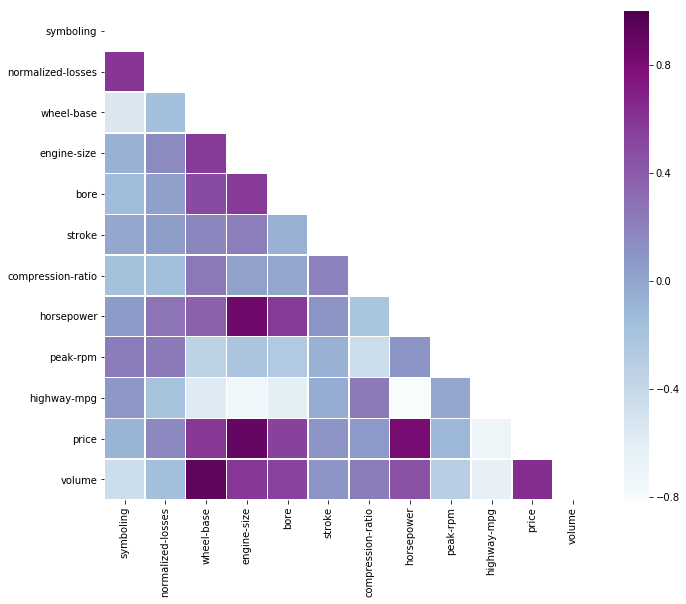

In [70]:
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(corr_all,mask=mask,square=True,linewidths=0.5,ax=ax,cmap='BuPu')
plt.show()

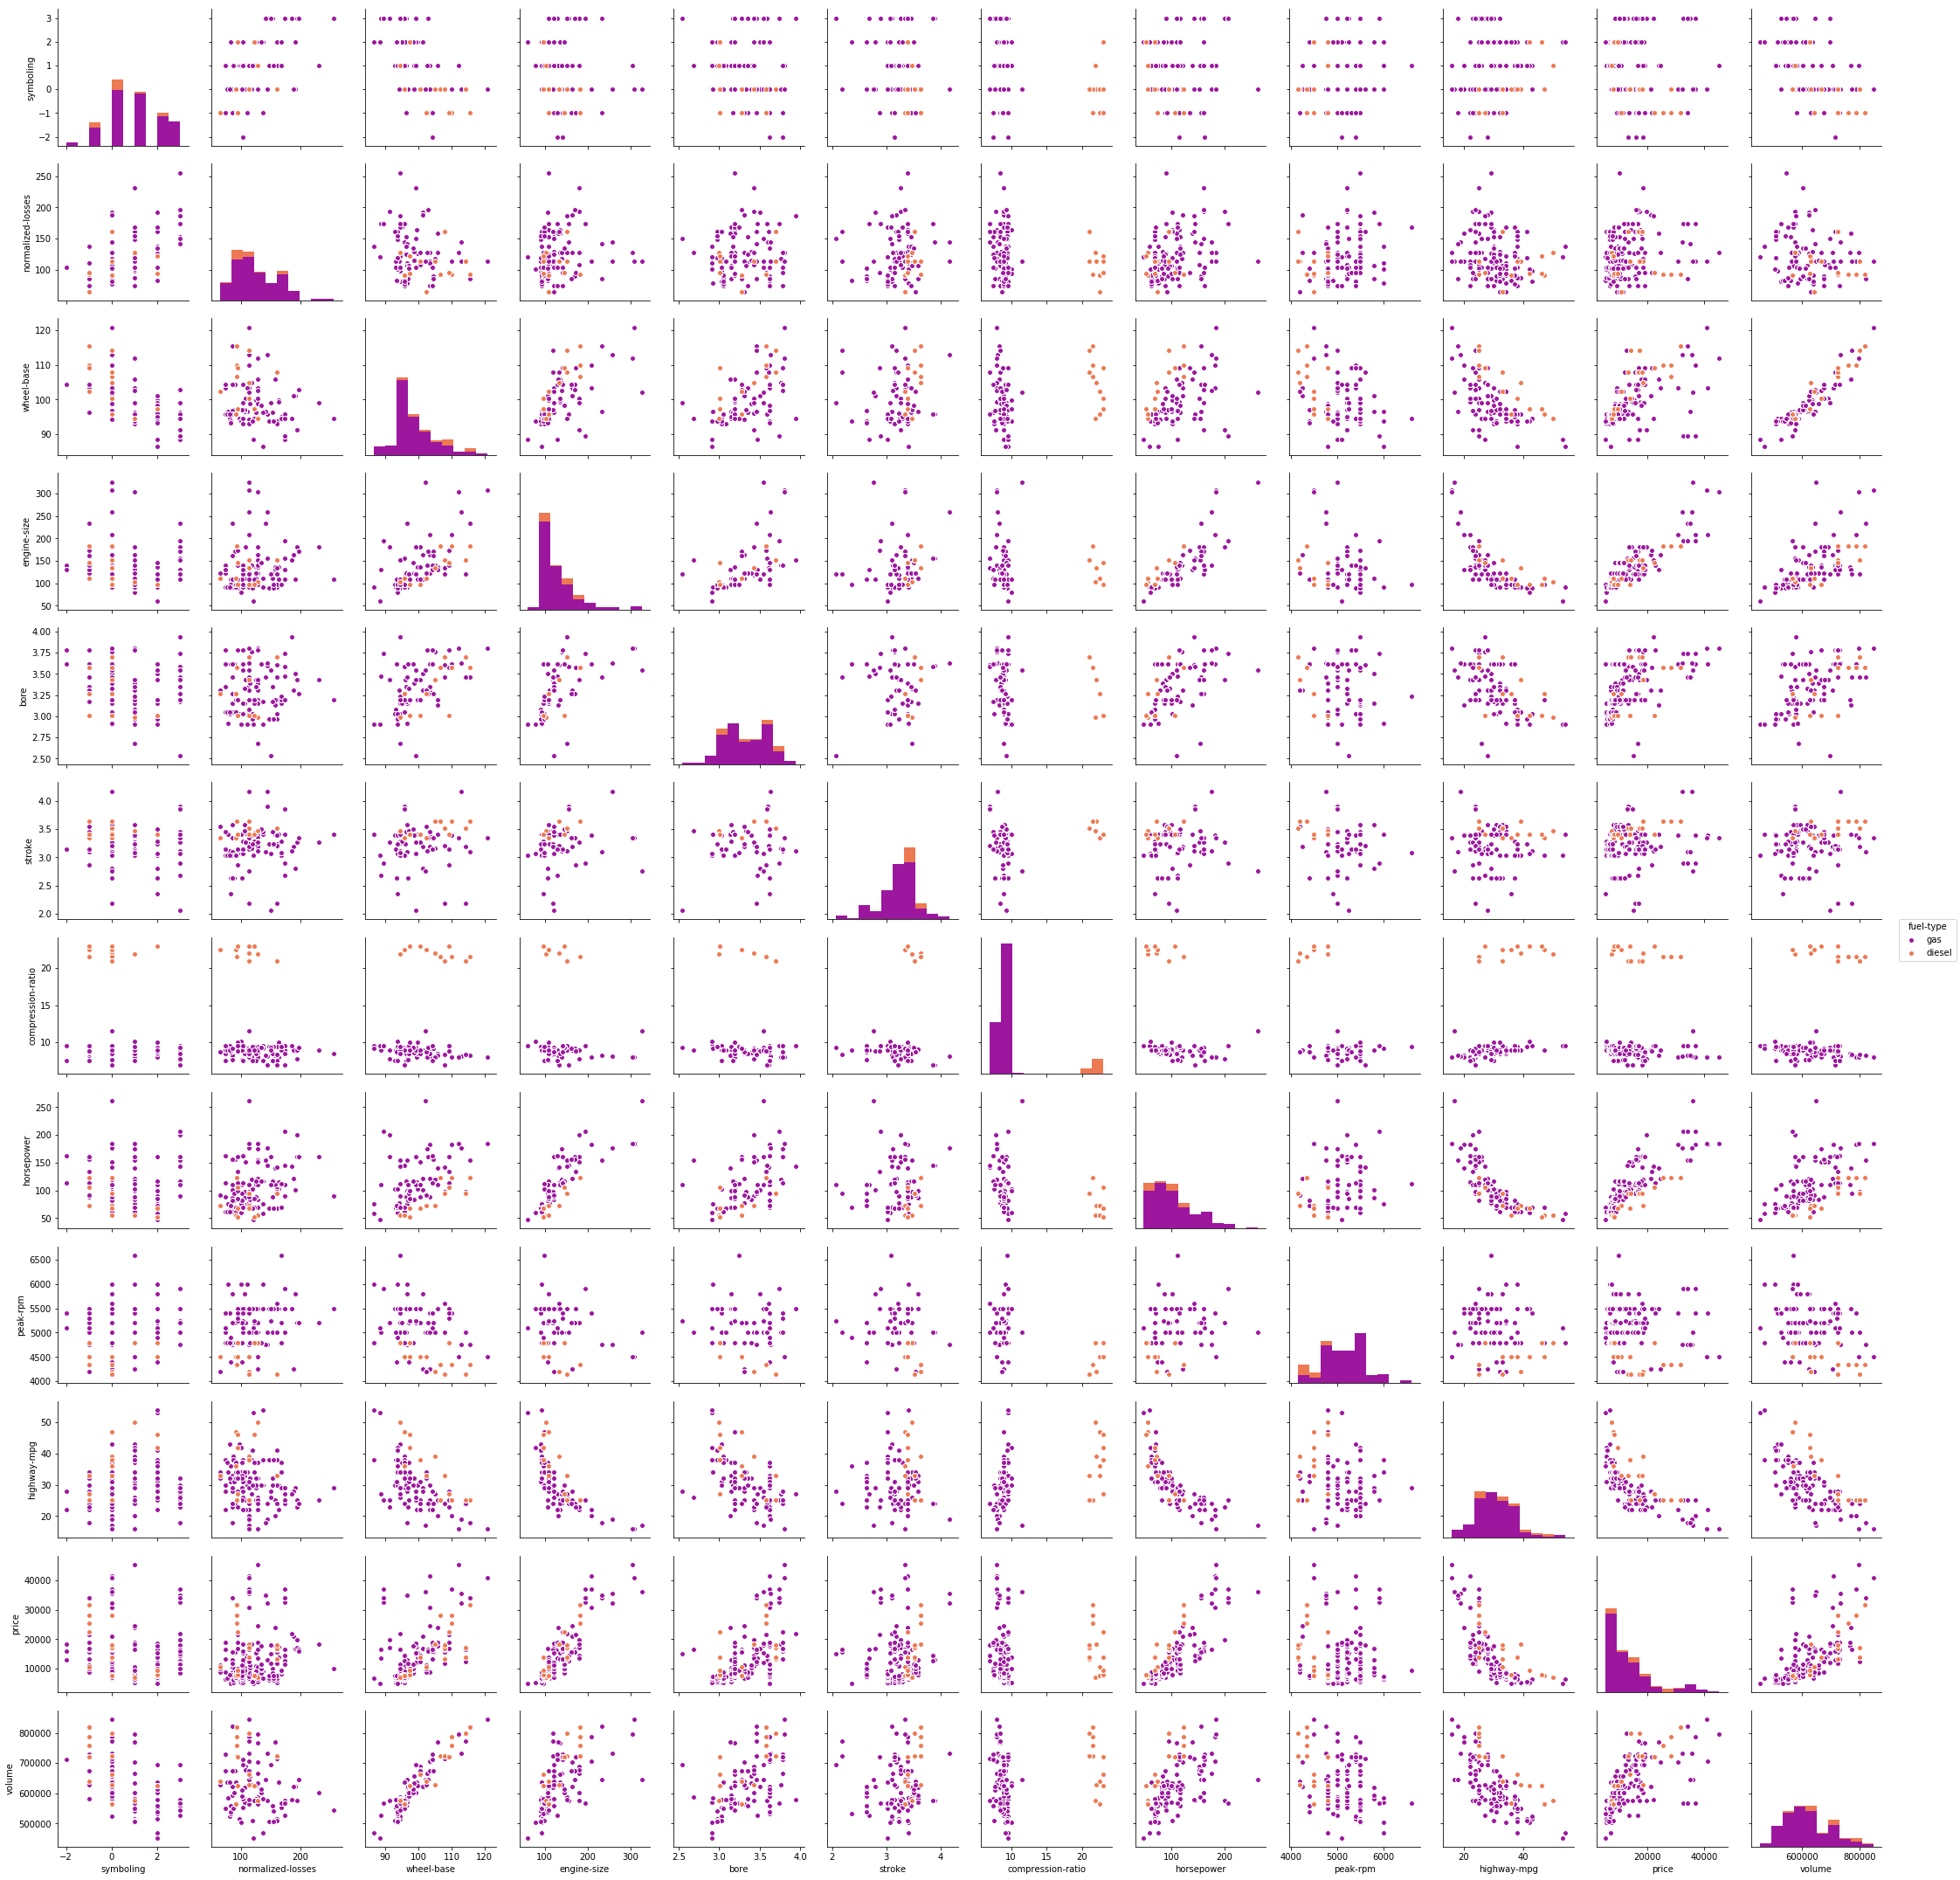

In [71]:
ax = sns.pairplot(data,hue='fuel-type',palette='plasma')

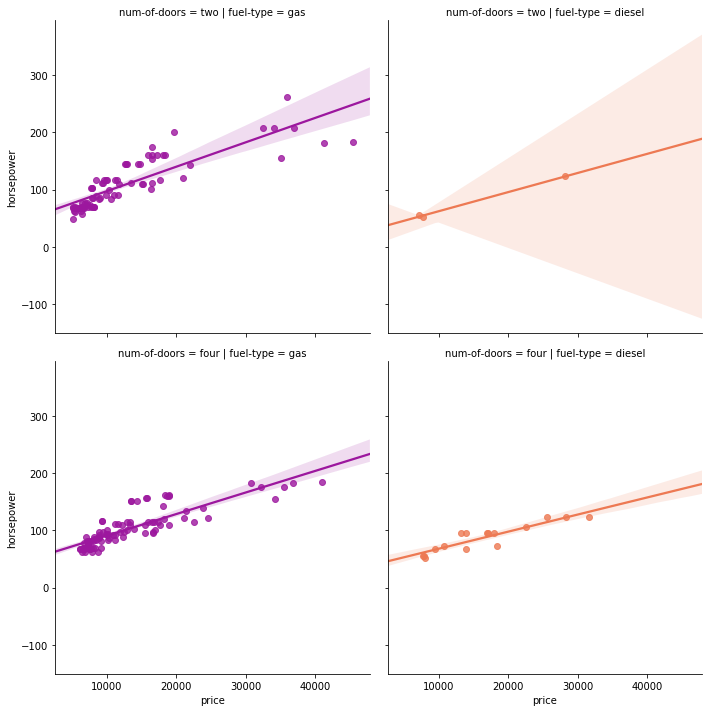

In [72]:
sns.lmplot('price', 'horsepower', data, 
           hue = 'fuel-type', col = 'fuel-type',  row = 'num-of-doors', 
           palette = 'plasma', 
           fit_reg = True);